### Import modules

In [153]:
"""This file is meant to explore and visualize the key takeaways from the paris bike count database found
at the following link : 
https://www.data.gouv.fr/fr/datasets/comptage-velo-donnees-compteurs/"""

# Import section
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import folium
from folium.plugins import HeatMap
import datetime
import urllib
import requests
from tqdm import tqdm


### Read data

In [3]:
# Read data

df = pd.read_csv(
    "data/comptage-velo-donnees-compteurs.csv",
    sep=";",
    usecols=[
        "id_compteur",
        "nom_compteur",
        "id",
        "name",
        "sum_counts",
        "date",
        "installation_date",
        "coordinates",
        "counter",
        "mois_annee_comptage",
    ],
    #nrows =100
)

df["date"] = pd.to_datetime(df["date"], utc=True)

df[["Latitude", "Longitude"]] = df.coordinates.str.split(",", expand=True).astype(
    "float"
)

In [4]:
df

,id_compteur,nom_compteur,id,name,sum_counts,date,installation_date,coordinates,counter,mois_annee_comptage,Latitude,Longitude
0,100003096-353242251,97 avenue Denfert Rochereau SO-NE,100003096,97 avenue Denfert Rochereau,0.0,2021-12-01 02:00:00+00:00,2012-02-22,"48.83504,2.33314",X2H20012081,2021-12,48.83504,2.33314
1,100003096-353242251,97 avenue Denfert Rochereau SO-NE,100003096,97 avenue Denfert Rochereau,2.0,2021-12-01 03:00:00+00:00,2012-02-22,"48.83504,2.33314",X2H20012081,2021-12,48.83504,2.33314
2,100003096-353242251,97 avenue Denfert Rochereau SO-NE,100003096,97 avenue Denfert Rochereau,0.0,2021-12-01 04:00:00+00:00,2012-02-22,"48.83504,2.33314",X2H20012081,2021-12,48.83504,2.33314
3,100003096-353242251,97 avenue Denfert Rochereau SO-NE,100003096,97 avenue Denfert Rochereau,213.0,2021-12-01 07:00:00+00:00,2012-02-22,"48.83504,2.33314",X2H20012081,2021-12,48.83504,2.33314
4,100003096-353242251,97 avenue Denfert Rochereau SO-NE,100003096,97 avenue Denfert Rochereau,84.0,2021-12-01 06:00:00+00:00,2012-02-22,"48.83504,2.33314",X2H20012081,2021-12,48.83504,2.33314
...,...,...,...,...,...,...,...,...,...,...,...,...
915147,300021320-353293614,69 Boulevard Ornano N-S,300021320,69 Boulevard Ornano,0.0,2023-01-17 09:00:00+00:00,2021-11-30,"48.89683,2.34521",Y2H21110997,2023-01,48.89683,2.34521
915148,300021320-353293614,69 Boulevard Ornano N-S,300021320,69 Boulevard Ornano,0.0,2023-01-17 10:00:00+00:00,2021-11-30,"48.89683,2.34521",Y2H21110997,2023-01,48.89683,2.34521
915149,300021320-353293614,69 Boulevard Ornano N-S,300021320,69 Boulevard Ornano,0.0,2023-01-17 14:00:00+00:00,2021-11-30,"48.89683,2.34521",Y2H21110997,2023-01,48.89683,2.34521
915150,300021320-353293614,69 Boulevard Ornano N-S,300021320,69 Boulevard Ornano,0.0,2023-01-17 15:00:00+00:00,2021-11-30,"48.89683,2.34521",Y2H21110997,2023-01,48.89683,2.34521


### Data exploration

In [3]:
print("The dataframe has the following columns", list(df.columns))
# We wish to compute the average hourly bike count over our dataframe
# date, sum counts.
temp = df.groupby(["date"])["sum_counts"].sum()
print("The average bike count per hour is {}.".format(temp.mean()))

The dataframe has the following columns ['id_compteur', 'nom_compteur', 'id', 'name', 'sum_counts', 'date', 'installation_date', 'coordinates', 'counter', 'mois_annee_comptage', 'Latitude', 'Longitude']
The average bike count per hour is 6328.746474459417.


### Data visualization

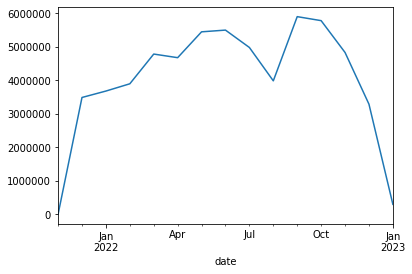

In [4]:
# We wish to plot the monthly bike count over time.
temp = df.groupby(pd.Grouper(key="date", freq="M"))["sum_counts"].sum()
fig = temp.plot(kind="line")
fig

In [5]:
# We wish to map the locations with the highest bike count on average.
heatmap_df = df.groupby(["Latitude", "Longitude"])["sum_counts"].sum()
locations = heatmap_df.index
weights = heatmap_df
map_obj = folium.Map(location=[48.864716, 2.349014], zoom_start=10)
HeatMap(locations, weights).add_to(map_obj)
map_obj

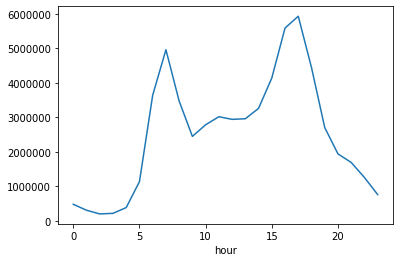

In [6]:
# We wish to plot the hourly bike count on average.
def hourly(date):
    return date.hour

temp = df.copy()
temp["hour"] = temp["date"].apply(hourly)
temp = temp.groupby("hour")["sum_counts"].sum()
fig = temp.plot(kind="line")
fig

### Merge informations for itinerary accidentology

In [ ]:
df.counter.value_counts()

Y2H19070377    19816
Y2H19070375    19816
Y2H19070372    19816
Y2H19070378    19816
Y2H19070380    19816
               ...  
Y2H22053370     9389
X2H20093888     8765
Y2H21100756     7036
Y2H20073268     3978
Y2H20052701     3212
Name: counter, Length: 67, dtype: int64

In [19]:
x, y = df.coordinates.unique()[0].split(",")

In [23]:
coords = []
for coord in df.coordinates.unique():
    x, y = coord.split(",")
    coords.append((float(x), float(y)))

In [218]:
map_obj = folium.Map(location=[48.864716, 2.349014], zoom_start=10)

for loc in coords:
    folium.Marker(location=loc).add_to(map_obj)
map_obj

In [31]:
def get_location(address: str):
    if not address:
        return None
    url = f'https://nominatim.openstreetmap.org/search/{urllib.parse.quote(address)}?format=json'
    response = requests.get(url).json()
    return response

In [121]:
counter_df = df.groupby("name").agg({"coordinates": "first", "counter": "first"}).reset_index()

In [123]:
addresses = []
for idx, row in counter_df.iterrows():
    address = row["name"]
    num_index = re.search(r"\d", address)
    numbers = re.findall('[0-9]+', address)

    if len(numbers) != 1:
        print(address)
        continue

    number = numbers[0]
    address_without_number = address[num_index.start()+len(number)+1:]
    
    counter_df.loc[idx, "number"] = int(number)
    counter_df.loc[idx, "street"] = address_without_number

Pont Charles De Gaulle
Pont National
Pont de Bercy
Pont de la Concorde
Pont des Invalides
Pont du Garigliano
Quai d'Orsay
Quai des Tuileries
Totem Cours la Reine
Voie Georges Pompidou


In [163]:
counter_df = counter_df[:66]

In [169]:
counter_df = counter_df.loc[counter_df.number.dropna().index]

In [170]:
paths_to_analyze = []
for idx, row in tqdm(counter_df.iterrows()):
    if not row.hasnans:
        continue
    street = row.street
    number = row.number
    
    start = f"1 {street}, Paris"
    end = f"{int(number) + 50} {street}, Paris"
    try:
        start_loc = get_location(start)[0]
        end_loc = get_location(end)[0]
    except Exception as e:
        continue
    
    counter_df.loc[idx, "start_address"] = start
    counter_df.loc[idx, "start_loc"] = f'{start_loc["lat"]},{start_loc["lon"]}'

    counter_df.loc[idx, "end_address"] = end
    counter_df.loc[idx, "end_loc"] = f'{end_loc["lat"]},{end_loc["lon"]}'

58it [00:07,  8.11it/s]


In [173]:
final_counter_df = counter_df.dropna()

In [174]:
final_counter_df.to_csv("data/counter_infos.csv")

In [ ]:
def floatify(str_coord):
    x, y = str_coord.split(",")
    return float(x), float(y)

In [186]:
row = final_counter_df.iloc[24]
map_obj = folium.Map(location=[48.864716, 2.349014], zoom_start=13)

folium.Marker(location=floatify(row.coordinates), popup="COUNTER").add_to(map_obj)
folium.Marker(location=floatify(row.end_loc), popup="END").add_to(map_obj)
folium.Marker(location=floatify(row.start_loc), popup="START").add_to(map_obj)
map_obj

In [215]:
for idx, row in final_counter_df.iterrows():
    df_counter = df[df.counter == row.counter]
    df_counter = df_counter[df_counter.date.dt.hour > 5]
    yearly_passage = round(
            df_counter.groupby(["date", "counter"]).agg({"sum_counts": "sum"}).mean()*24*365
        ).loc["sum_counts"]
    final_counter_df.loc[idx, "yearly_passage"] = yearly_passage

In [217]:
final_counter_df.to_csv("data/counter_infos.csv")